In [1]:
import pandas as pd


df = pd.read_csv('CapstoneData.csv') D


In [2]:

df['IS_GENERIC'] = df['BNF_PRESENTATION_NAME'] == df['GENERIC_BNF_EQUIVALENT_NAME']


In [3]:

icb_generic_stats = (
    df.groupby('ICB_NAME')['IS_GENERIC']
    .agg(['count', 'sum'])
    .reset_index()
    .rename(columns={'count': 'TOTAL_PRESCRIPTIONS', 'sum': 'GENERIC_PRESCRIPTIONS'})
)

icb_generic_stats['GENERIC_RATE'] = (
    icb_generic_stats['GENERIC_PRESCRIPTIONS'] / icb_generic_stats['TOTAL_PRESCRIPTIONS']
)


In [4]:
# Sort to find best and worst ICBs in generic prescribing
best_icbs = icb_generic_stats.sort_values(by='GENERIC_RATE', ascending=False).head(10)
worst_icbs = icb_generic_stats.sort_values(by='GENERIC_RATE').head(10)

# Display both
print("Top 10 ICBs using generics most often:")
print(best_icbs)

print("\nBottom 10 ICBs (lowest use of generics):")
print(worst_icbs)


Top 10 ICBs using generics most often:
                                             ICB_NAME  TOTAL_PRESCRIPTIONS  \
31  NHS NOTTINGHAM AND NOTTINGHAMSHIRE INTEGRATED ...                17936   
15       NHS GREATER MANCHESTER INTEGRATED CARE BOARD                17743   
24      NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD                18058   
6   NHS CAMBRIDGESHIRE AND PETERBOROUGH INTEGRATED...                17454   
37  NHS STAFFORDSHIRE AND STOKE-ON-TRENT INTEGRATE...                15799   
27  NHS NORTH EAST AND NORTH CUMBRIA INTEGRATED CA...                18601   
21  NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CA...                16770   
7   NHS CHESHIRE AND MERSEYSIDE INTEGRATED CARE BOARD                17282   
41           NHS WEST YORKSHIRE INTEGRATED CARE BOARD                17084   
2   NHS BIRMINGHAM AND SOLIHULL INTEGRATED CARE BOARD                11229   

    GENERIC_PRESCRIPTIONS  GENERIC_RATE  
31                  12024      0.670384  
15                

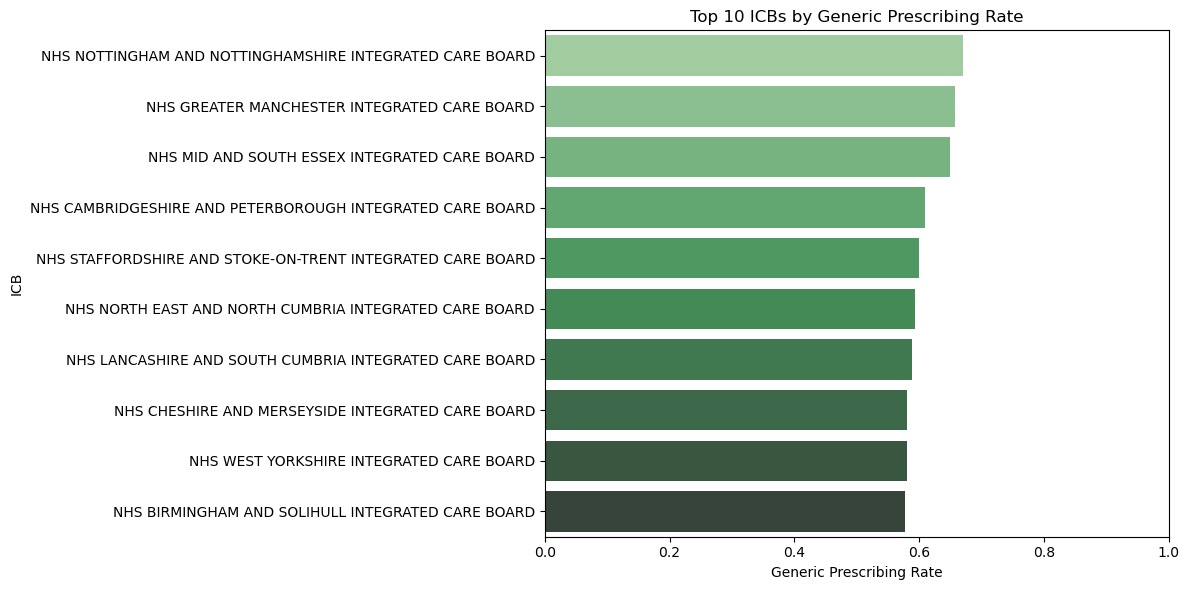

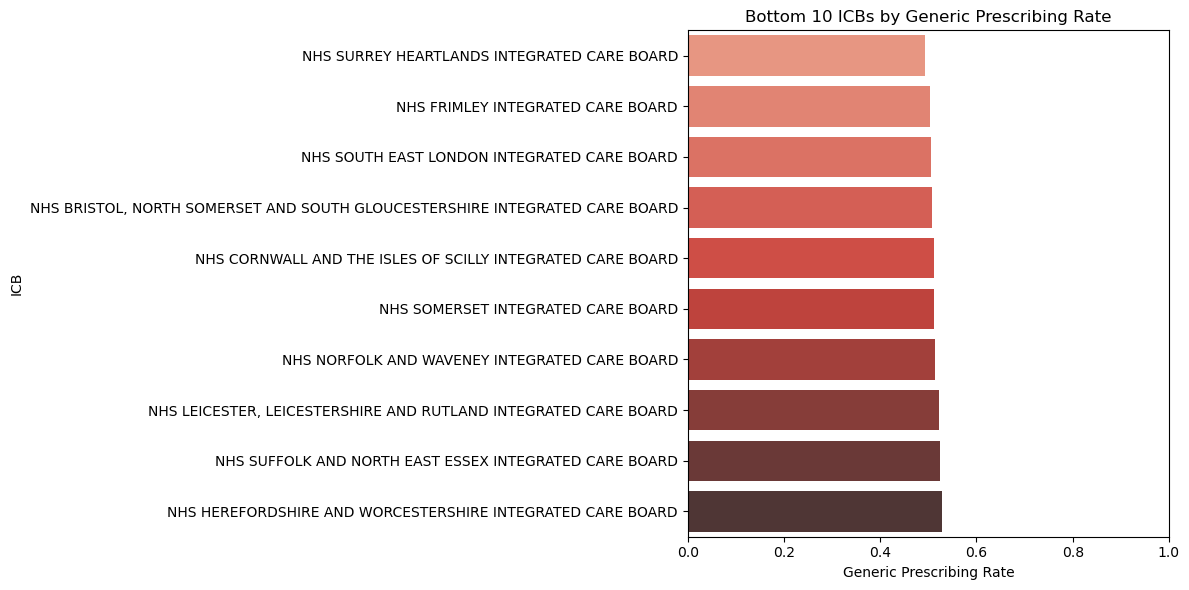

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10
plt.figure(figsize=(12,6))
sns.barplot(data=best_icbs, x='GENERIC_RATE', y='ICB_NAME', palette='Greens_d')
plt.title('Top 10 ICBs by Generic Prescribing Rate')
plt.xlabel('Generic Prescribing Rate')
plt.ylabel('ICB')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Plot bottom 10
plt.figure(figsize=(12,6))
sns.barplot(data=worst_icbs, x='GENERIC_RATE', y='ICB_NAME', palette='Reds_d')
plt.title('Bottom 10 ICBs by Generic Prescribing Rate')
plt.xlabel('Generic Prescribing Rate')
plt.ylabel('ICB')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
